In [152]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding
import logging
import numpy as np
import pandas as pd
import math
import numpy as np

In [70]:
#將人工標註結果載入
y_train = []
data_path = r"C:\Users\peihsuan\Downloads\17check_correct\train_text.txt"
df = pd.read_csv(data_path,encoding='big5')  
y_train = df['label']

In [71]:
print(y_train[0])

0


In [229]:
#將學生答案載入
train_text = []
data_path = r"C:\Users\peihsuan\Downloads\17check_correct\text_embedding.csv"
#df = pd.read_csv(data_path,encoding= 'big5',names=['text','embeddings'])  
df = pd.read_csv(data_path,encoding= 'big5',sep = ';') 
train_text = df['text']

In [230]:
print(train_text[0])

夾


In [233]:
#將文字embedding作為其中一項feature儲存
x_train_seq_tmp = []
x_train_seq_tmp = df['embeddings']

In [235]:
#將embedding轉為數字陣列
tmp = []
x_train_seq = []
for items in range(0,len(x_train_seq_tmp)):
    tmp=np.fromstring(x_train_seq_tmp[items], dtype=float, sep=',')
    x_train_seq.append(tmp)
    tmp = []

In [236]:
print(len(train_text))

861


In [237]:
print(len(y_train))

861


In [267]:
print(len(x_train_seq[0]))

250


In [269]:
#將訓練資料切分為訓練及測試
train_size = int(len(train_text) * 0.8)
train_textembedding, test_textembedding = x_train_seq[:train_size], x_train_seq[train_size:]
y_train_predict, y_test_predict = y_train[:train_size],y_train[train_size:]

In [289]:
#建立模型
#* 平坦層: 共有 3,200 = 32 * 100 個神經元, 共有 100 個 Token 數字, 每一個 Token 使用 32 維度來表示數字 1-2000.
#* 平坦層: 共有 250 個 Token 數字, 每一個 Token 使用 250 維度來表示數字 1.
#* 隱藏層: 共有 256 個神經元
#* 輸出層: 只有一個神經元. 1 表示正面; 0 表示負面.

model = Sequential()
#model.add(Embedding(output_dim=32,  input_dim=2000,  input_length=100))  
#model.add(Embedding(output_dim=250,  input_dim=11,  input_length=250))
#model.add(Dropout(0.2))
#model.add(Flatten())
model.add(Dense(units=256,activation='relu',input_dim=250 ))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid' ))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 256)               64256     
_________________________________________________________________
dropout_39 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 257       
Total params: 64,513
Trainable params: 64,513
Non-trainable params: 0
_________________________________________________________________


In [313]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [314]:
train_history =model.fit(np.array(train_textembedding), np.array(y_train_predict),batch_size=5, epochs=5,verbose=2,validation_split=0.2)

Train on 550 samples, validate on 138 samples
Epoch 1/5
 - 1s - loss: 0.0511 - acc: 0.9855 - val_loss: 1.0576 - val_acc: 0.9058
Epoch 2/5
 - 0s - loss: 0.0519 - acc: 0.9855 - val_loss: 1.0524 - val_acc: 0.9058
Epoch 3/5
 - 0s - loss: 0.0471 - acc: 0.9855 - val_loss: 1.0292 - val_acc: 0.9130
Epoch 4/5
 - 0s - loss: 0.0516 - acc: 0.9836 - val_loss: 1.0311 - val_acc: 0.9130
Epoch 5/5
 - 0s - loss: 0.0498 - acc: 0.9855 - val_loss: 1.0311 - val_acc: 0.9130


In [293]:
%pylab inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


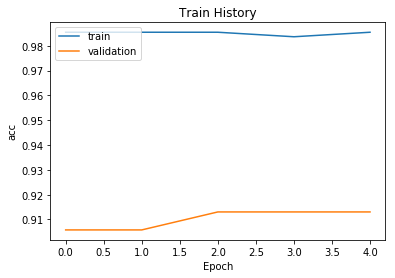

In [315]:
show_train_history(train_history,'acc','val_acc')

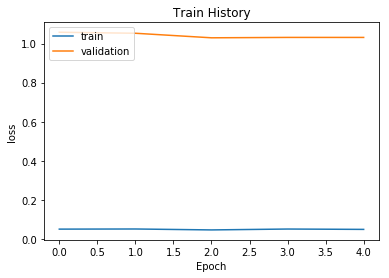

In [316]:
show_train_history(train_history,'loss','val_loss')

In [318]:
#測試準確率
scores = model.evaluate(np.array(test_textembedding), np.array(y_test_predict), verbose=1)
scores[1]

173/173 [==============================] - 0s 260us/step


0.8843930642728861

In [322]:
#預測機率
probility=model.predict(np.array(test_textembedding))

In [324]:
predict=model.predict_classes(np.array(test_textembedding))

In [325]:
predict.shape

(173, 1)

In [334]:
predict_classes=predict.reshape(173)

In [328]:
SentimentDict={1:'屬於A',0:'不屬於A'}
def display_test_Sentiment(i):
    print(train_text[i])
    print('標籤label:',SentimentDict[y_train[i]],'預測結果:',SentimentDict[predict_classes[i]])

In [333]:
for i in range(0,10):
    display_test_Sentiment(i)
    print("\n")

夾
標籤label: 不屬於A 預測結果: 不屬於A


衣服
標籤label: 屬於A 預測結果: 不屬於A


裁縫
標籤label: 不屬於A 預測結果: 不屬於A


白
標籤label: 屬於A 預測結果: 不屬於A


民生
標籤label: 不屬於A 預測結果: 不屬於A


用品
標籤label: 屬於A 預測結果: 不屬於A


白色
標籤label: 屬於A 預測結果: 屬於A


白色
標籤label: 屬於A 預測結果: 不屬於A


白色
標籤label: 屬於A 預測結果: 屬於A


裝
標籤label: 不屬於A 預測結果: 不屬於A


